In [1]:
# Import the third-party libraries we want
import numpy as np
import pandas as pd
from scipy import interpolate, signal

In [2]:
# Show interactive graphs - if you're using the Jupyter interface in VS Code instead of a standalone Jupyter server,
# change "notebook" to "inline"
%matplotlib notebook

In [4]:
# Import features from the latency utils script provided by the latency tracker tool
from latency_utils import read_without_headers, read_with_headers, extract_range, get_max_corr_latency, compute_cross_correlation, plot_overlaid, rescale_brightness, ms_to_periods, get_frame_with_shifted_tracker

Read in your file. Use this one if your file starts with a header row. Otherwise, use `read_without_headers`

In [6]:
orig_df = read_with_headers('latency2-trimmed.csv')

Roughly plot this, to see what timestamps should be used as start and end.

<IPython.core.display.Javascript object>


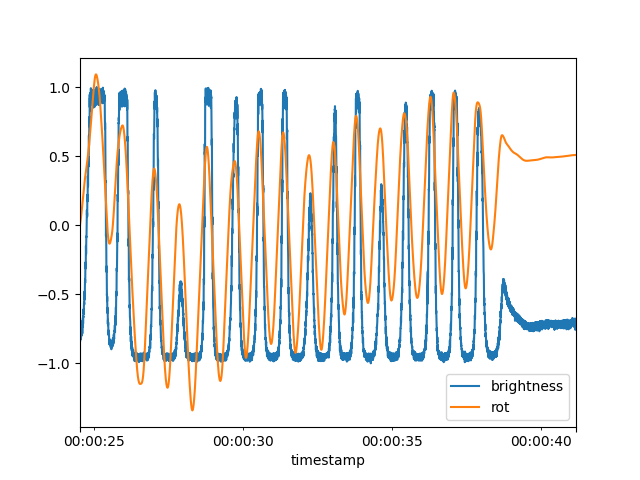

<AxesSubplot:xlabel='timestamp'>

In [7]:
rescale_brightness(orig_df)[['brightness', 'rot']].plot()

Suppose now you see that the time between about 00:00:28 (28 seconds) and 00:00:38 looks clean in both brightness and rotation. Extract that and re-scale the brightness in a persistent way.

In [8]:
df = extract_range(orig_df, 32, 38)
df = rescale_brightness(df)

You can explore the data yourself in graph form. The vertical lines indicate where the rotation changes direction.

<IPython.core.display.Javascript object>


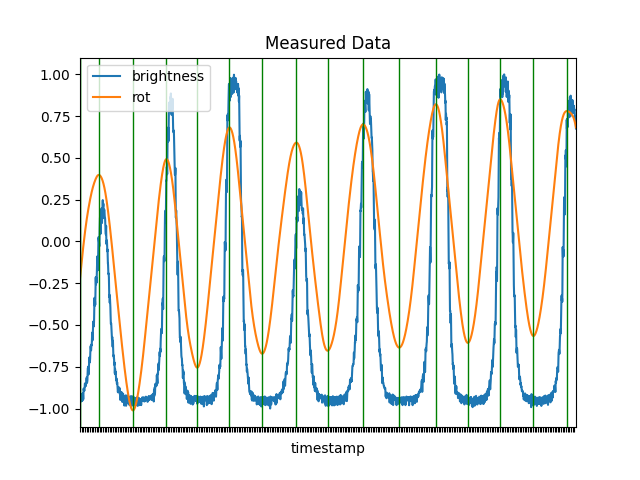

<AxesSubplot:title={'center':'Measured Data'}, xlabel='timestamp'>

In [9]:
plot_overlaid(df, title='Measured Data')

You can also compute the cross-correlation, to try syncing the entire waveform, especially if you don't have any prediction applied to the application's tracking/rendering. The following says try the range 0ms to 100ms, at default (1ms) intervals.

In [10]:
corr = compute_cross_correlation(df, 0, 100)

Extract the max correlation's associated latency.

In [11]:
get_max_corr_latency(corr)

53

You can also plot a "corrected" data set: with the rotation delayed according to what the cross-correlation decided was the latency.

<IPython.core.display.Javascript object>


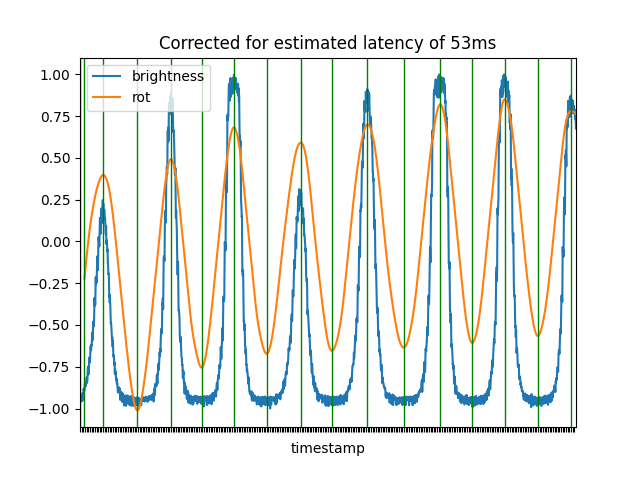

<AxesSubplot:title={'center':'Corrected for estimated latency of 53ms'}, xlabel='timestamp'>

In [12]:
latency = get_max_corr_latency(corr)
df_corrected = get_frame_with_shifted_tracker(df, ms_to_periods(latency))
plot_overlaid(df_corrected, title=f'Corrected for estimated latency of {latency}ms')